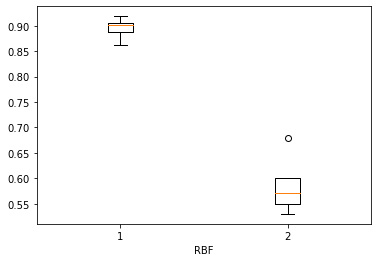

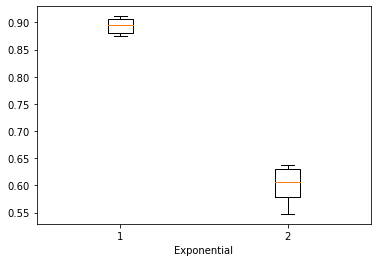

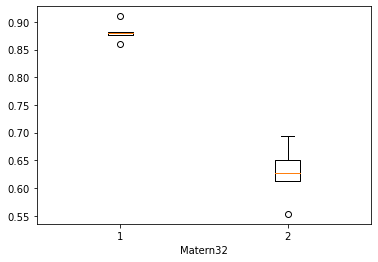

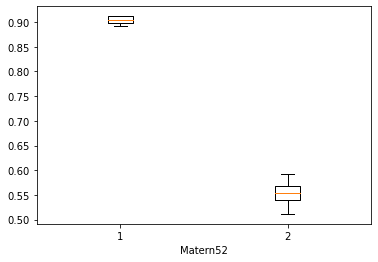

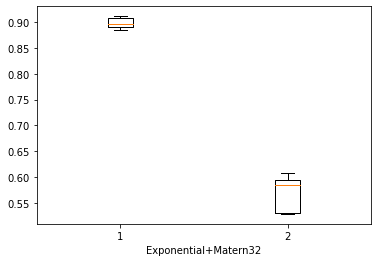

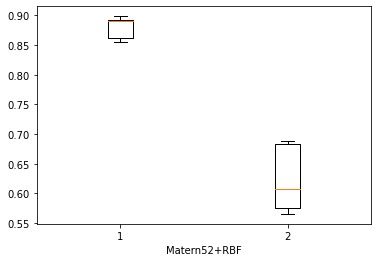

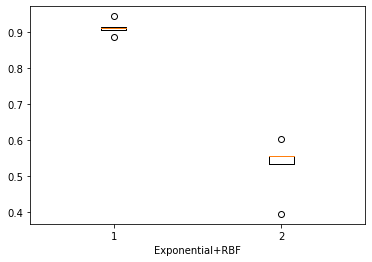

In [1]:
# Libraries for support

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import GPy
from sklearn.metrics import r2_score
from scipy.stats import norm

from Booster_single_obj_new import Booster

# Defining RMSE error

def rmse(Y_test, Y_hat):
    return np.sqrt(np.mean((Y_test - Y_hat)**2))

# Defining MNLL error

def mnll(Y_test, Y_hat, Cov):
    s = 0
    for i in range(int(test_points)):
        s = s + norm.pdf((Y_test[i]-Y_hat[i])/Cov[i,i])
    return s/test_points

# Defining standard RMSE error

def stdrmse(Y_test, Y_hat):
    return np.sqrt(np.mean((np.mean(Y_test) - np.mean(Y_hat))**2))
        
# Number of dimensions of input

num_dim = 4

project_table= open("project_table.txt","a+")
project_table.write("kernel name \t pts \t ls \t var \t R2 score mean \t R2 score stddev \t RMSE mean \t RMSE stddev \t MNLL mean \t MNLL stddev \t Std RMSE mean \t Std RMSE stddev \n")

# Choice of kernel

ks = [ # List of example kernels
    GPy.kern.RBF(num_dim),
    GPy.kern.Exponential(num_dim),
    GPy.kern.Matern32(num_dim),
    GPy.kern.Matern52(num_dim),
    GPy.kern.Exponential(num_dim) + GPy.kern.Matern32(num_dim),
    GPy.kern.Matern52(num_dim)*GPy.kern.RBF(num_dim),
    GPy.kern.Exponential(num_dim) + GPy.kern.RBF(num_dim)
]

# kernel names for input in txt file
kernel_name = ["RBF", "Exponential", "Matern32", "Matern52", "Exponential+Matern32", "Matern52+RBF", "Exponential+RBF"]

# Total number of points
pts = [500, 1000]

ls = [.1, 1, 10] # choice of lengthscales
vs = [.1, 1, 10] # choice of variance

jj = 0 #counter for input names to txt file

for k in ks: #loop over kernels
    
    for l in ls: #loop over lengthscales
        
        k.lengthscale = l   # Set the lengthscale to be l
            
        for v in vs:   #loop over variance
        
            k.variance = v  # Set the variance parameter of the kernel
            
            for total_points in pts: # loop over number of points

                # Training points define

                training_points = np.floor(0.8*total_points) 
                training_points = int(training_points)

                # 5 samples of training points

                X_train1 = np.random.uniform(0, 1, (training_points, num_dim))
                X_train2 = np.random.uniform(0, 1, (training_points, num_dim))
                X_train3 = np.random.uniform(0, 1, (training_points, num_dim))
                X_train4 = np.random.uniform(0, 1, (training_points, num_dim))
                X_train5 = np.random.uniform(0, 1, (training_points, num_dim))

                # Initializing training points Y (5 samples)

                Y_train1 = np.random.uniform(0, 0, (training_points, 1))
                Y_train2 = np.random.uniform(0, 0, (training_points, 1))
                Y_train3 = np.random.uniform(0, 0, (training_points, 1))
                Y_train4 = np.random.uniform(0, 0, (training_points, 1))
                Y_train5 = np.random.uniform(0, 0, (training_points, 1))
                Cons = np.random.uniform(0, 0, (9, training_points))

                    # compute training points Y

                for i in range(training_points):
                    Y_train1[i],Cons[:,i]=Booster(X_train1[i,:])
                    Y_train2[i],Cons[:,i]=Booster(X_train2[i,:])
                    Y_train3[i],Cons[:,i]=Booster(X_train3[i,:])
                    Y_train4[i],Cons[:,i]=Booster(X_train4[i,:])
                    Y_train5[i],Cons[:,i]=Booster(X_train5[i,:])

                    
                # Test data X

                test_points = total_points - training_points

                X_test1 = np.random.uniform(0, 1, (test_points, num_dim))
                X_test2 = np.random.uniform(0, 1, (test_points, num_dim))
                X_test3 = np.random.uniform(0, 1, (test_points, num_dim))
                X_test4 = np.random.uniform(0, 1, (test_points, num_dim))
                X_test5 = np.random.uniform(0, 1, (test_points, num_dim))
                
                    # Performing Regression

                m1 = GPy.models.GPRegression(X_train1, Y_train1, k)
                m1.optimize()
                Y_hat1, Cov1 = m1.predict_noiseless(X_test1, full_cov=True)
                m2 = GPy.models.GPRegression(X_train2, Y_train2, k)
                m2.optimize()
                Y_hat2, Cov2 = m2.predict_noiseless(X_test2, full_cov=True)
                m3 = GPy.models.GPRegression(X_train3, Y_train3, k)
                m3.optimize()
                Y_hat3, Cov3 = m3.predict_noiseless(X_test3, full_cov=True)
                m4 = GPy.models.GPRegression(X_train4, Y_train4, k)
                m4.optimize()
                Y_hat4, Cov4 = m4.predict_noiseless(X_test4, full_cov=True)
                m5 = GPy.models.GPRegression(X_train5, Y_train5, k)
                m5.optimize()
                Y_hat5, Cov5 = m5.predict_noiseless(X_test5, full_cov=True)


                Y_test1 = np.random.uniform(0, 0, (test_points, 1))
                Y_test2 = np.random.uniform(0, 0, (test_points, 1))
                Y_test3 = np.random.uniform(0, 0, (test_points, 1))
                Y_test4 = np.random.uniform(0, 0, (test_points, 1))
                Y_test5 = np.random.uniform(0, 0, (test_points, 1))
                Cons2 = np.random.uniform(0, 0, (9, test_points))

                for i in range(test_points):
                    Y_test1[i],Cons2[:,i]=Booster(X_test1[i,:])
                    Y_test2[i],Cons2[:,i]=Booster(X_test2[i,:])
                    Y_test3[i],Cons2[:,i]=Booster(X_test3[i,:])
                    Y_test4[i],Cons2[:,i]=Booster(X_test4[i,:])
                    Y_test5[i],Cons2[:,i]=Booster(X_test5[i,:])

                    # Errors

                    # Calculating R2 score -- more its close to one, its good


                e11 = r2_score(Y_test1, Y_hat1)
                e12 = r2_score(Y_test2, Y_hat2)
                e13 = r2_score(Y_test3, Y_hat3)
                e14 = r2_score(Y_test4, Y_hat4)
                e15 = r2_score(Y_test5, Y_hat5)

                e1s = [e11, e12, e13, e14, e15] 

                e1 = np.mean(e1s)
                e1_std = np.std(e1s)

                    #print("R2 score is: ",e1)

                e21 = rmse(Y_test1, Y_hat1)
                e22 = rmse(Y_test2, Y_hat2)
                e23 = rmse(Y_test3, Y_hat3)
                e24 = rmse(Y_test4, Y_hat4)
                e25 = rmse(Y_test5, Y_hat5)

                e2s = [e21, e22, e23, e24, e25] 

                e2 = np.mean(e2s)
                e2_std = np.std(e2s)

                    #print("rmse is: ",e2)

                e31 = mnll(Y_test1, Y_hat1, Cov1)
                e32 = mnll(Y_test2, Y_hat2, Cov2)
                e33 = mnll(Y_test3, Y_hat3, Cov3)
                e34 = mnll(Y_test4, Y_hat4, Cov4)
                e35 = mnll(Y_test5, Y_hat5, Cov5)

                e3s = [e31, e32, e33, e34, e35] 

                e3 = np.mean(e3s)
                e3_std = np.std(e3s)
                    #print("Mnll is: ",e3)

                e41 = stdrmse(Y_test1, Y_hat1)
                e42 = stdrmse(Y_test2, Y_hat2)
                e43 = stdrmse(Y_test3, Y_hat3)
                e44 = stdrmse(Y_test4, Y_hat4)
                e45 = stdrmse(Y_test5, Y_hat5)

                e4s = [e41, e42, e43, e44, e45] 

                e4 = np.mean(e4s)
                e4_std = np.std(e4s)

                #print("stdrmse is: ",e4)



                project_table.write("%s & \t" % (kernel_name[jj]))
                project_table.write("%f & \t" % (total_points))
                project_table.write("%f & \t" % (l))
                project_table.write("%f & \t" % (v))
                project_table.write("%f & \t" % (e1))
                project_table.write("%f & \t" % (e1_std))
                project_table.write("%f & \t" % (e2))
                project_table.write("%f & \t" % (e2_std))
                project_table.write("%f & \t" % (e3))
                project_table.write("%f & \t" % (e3_std))
                project_table.write("%f & \t" % (e4))
                project_table.write("%f \\\ \hline \n" % (e4_std))
                plt.xlabel(kernel_name[jj])
                plt.boxplot((e1s, e2s))
                plt.savefig(kernel_name[jj])
                plt.show()
    jj = jj+1

project_table.close() 